![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [73]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
# Start coding!

In [74]:
df = pd.read_csv('car_insurance.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

Tratando valores ausentes


id                     False
age                    False
gender                 False
driving_experience     False
education              False
income                 False
credit_score            True
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage          True
vehicle_type           False
speeding_violations    False
duis                   False
past_accidents         False
outcome                False
dtype: bool


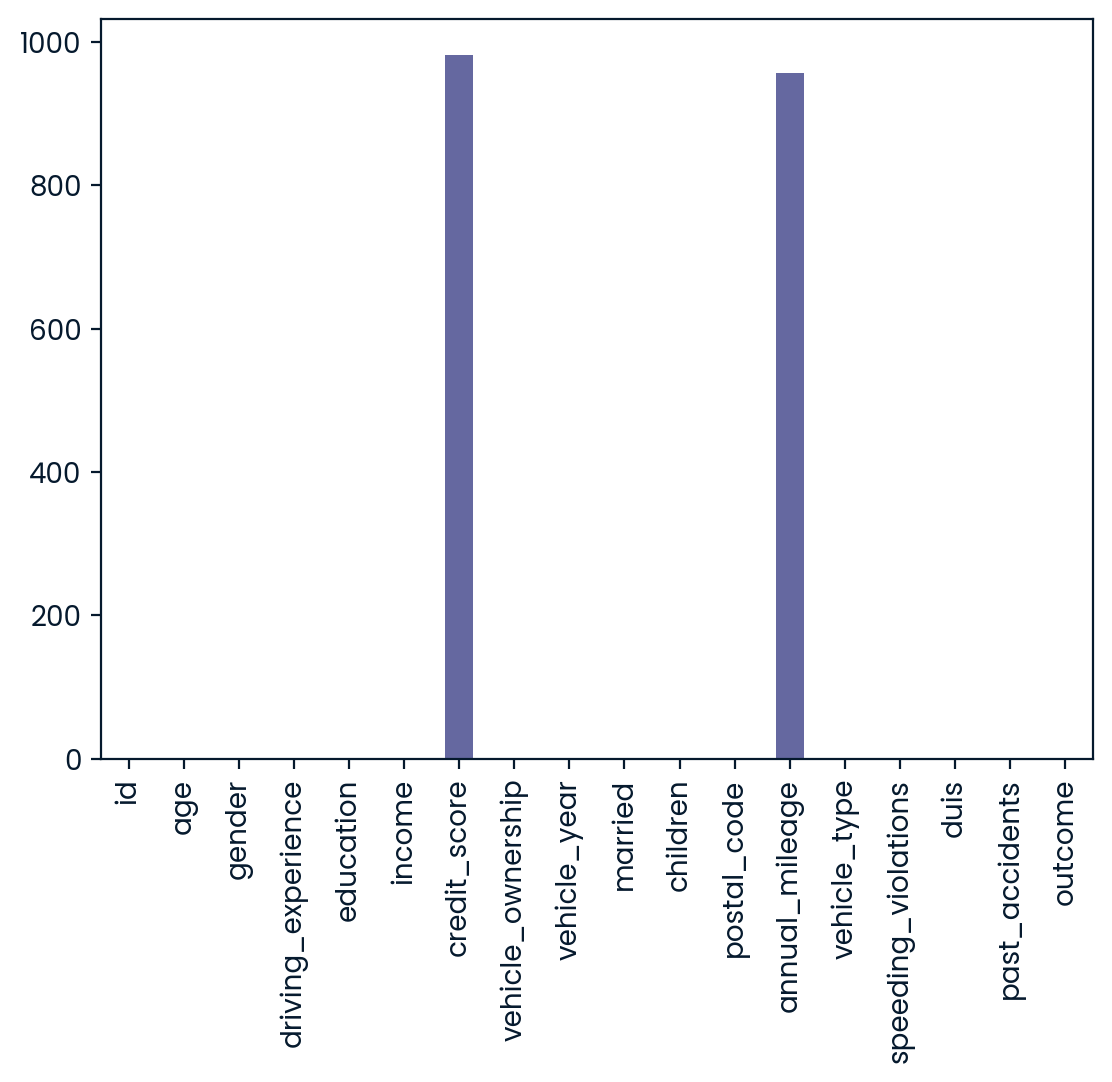

In [76]:
print(df.isna().any())
df.isna().sum().plot(kind='bar')
plt.show()

# colunas annual_mileage e credit_score

In [77]:
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [78]:
df.isna().any()

id                     False
age                    False
gender                 False
driving_experience     False
education              False
income                 False
credit_score           False
vehicle_ownership      False
vehicle_year           False
married                False
children               False
postal_code            False
annual_mileage         False
vehicle_type           False
speeding_violations    False
duis                   False
past_accidents         False
outcome                False
dtype: bool

Variáveis e modelos

In [79]:
features = df.drop(columns=['outcome', 'id']).columns
models = []

In [80]:
# Encontrar o melhor preditor variável 
for col in features:
    model = logit(f'outcome ~ {col}',data = df).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [81]:
accuracies =[]
for i in range(len(models)):
    conf_matrix = models[i].pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    acu = (TN +TP)/(TN+TP+FN+FP)
    accuracies.append(acu)

In [82]:
# mapeando o melhor modelo através de métrica de precisão (accuracie)
max_accu = max(accuracies)
ind = accuracies.index(max_accu)

In [83]:
print(max_accu) # <-- melhor acccuracie
print(ind) # < --- o indice do melhor modelo

0.7771
2


In [84]:
features[ind]

'driving_experience'

In [85]:
best_feature_df = pd.DataFrame({'best_feature':[features[ind]], 'best_accuracy':[max_accu]}, index= [0])

In [86]:
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
